## Sentiment and Word Frequency Analysis Using the CNN RSS Feed

* Collects the first 5 articles from the cnn US feed on December 11, 2017, makes wordclouds, asseses basic sentiment and plotts the frequency of use of the top 5 most common words across the 5 articles.

In [1]:
import feedparser
from goose import Goose
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import tokenize
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Collecting the first 5 news articles

In [21]:
# Pulling the first 5 elements of the CNN RSS feed
d = feedparser.parse('http://rss.cnn.com/rss/cnn_us.rss')
a = d.entries[0:5] 

In [22]:
# Obtaining the cleaned text for the first 5 elements, we see that not all of them are articles, some are videos and
# lack text beyond a title
sid = SentimentIntensityAnalyzer()
g = Goose()
[g.extract(a[i].link).cleaned_text for i in range(5)]

[u'(CNN) It was the latest lone wolf attack to target New York City. And it might have been worse.\n\nA man wearing a homemade pipe bomb set off the explosive in a busy transit hub on Monday, injuring five and setting off panic during the morning commute.\n\nAuthorities said the explosion in a walkway below Port Authority Bus Terminal was an isolated attempted terrorist attack. Officials said the suspect, 27-year-old Akayed Ullah, pledged allegiance to ISIS and said he acted in response to Israeli actions in Gaza.\n\nInvestigators said the suspect had at least two devices, a law enforcement source with knowledge of the investigation told CNN. The device that detonated was a foot-long pipe that contained black powder, a battery, wiring, nails and screws. It was attached to Ullah with Velcro and zip ties. Investigators did not elaborate on the second device, the source said.\n\nThe explosive chemical ignited in the pipe but the pipe itself did not explode, lessening its impact, New York 

In [29]:
# Back to the drawing board
len(d.entries) # 29
# Extracting the cleaned text for all articles pulled from the RSS feed
allElements = [g.extract(d.entries[i].link).cleaned_text for i in range(29)]

In [44]:
# Checking out the text lengths of all elements collected from the newsfeed
textLengths = [len(allElements[i]) for i in range(29)]
print(textLengths)
# Colecting first 5 elements with text lengths greater than 100. (Videos could have short descriptions, but beyond 100 
# words, we are probably dealing with news articles)
articles = [element for element in allElements if len(element) > 100][0:5]
#articles

[5930, 0, 41, 0, 2457, 3541, 2321, 0, 2654, 2504, 4554, 2003, 685, 0, 1856, 0, 573, 1073, 0, 2481, 1208, 2412, 1347, 2334, 896, 849, 541, 2418, 1422]


[u'(CNN) It was the latest lone wolf attack to target New York City. And it might have been worse.\n\nA man wearing a homemade pipe bomb set off the explosive in a busy transit hub on Monday, injuring five and setting off panic during the morning commute.\n\nAuthorities said the explosion in a walkway below Port Authority Bus Terminal was an isolated attempted terrorist attack. Officials said the suspect, 27-year-old Akayed Ullah, pledged allegiance to ISIS and said he acted in response to Israeli actions in Gaza.\n\nInvestigators said the suspect had at least two devices, a law enforcement source with knowledge of the investigation told CNN. The device that detonated was a foot-long pipe that contained black powder, a battery, wiring, nails and screws. It was attached to Ullah with Velcro and zip ties. Investigators did not elaborate on the second device, the source said.\n\nThe explosive chemical ignited in the pipe but the pipe itself did not explode, lessening its impact, New York 

### Creating wordclouds

In [78]:
# Tokenize articles. The nltk.word_tokenizer, separates genitive particles like "'s" in "Nasa's" as individual tokens.
# Contractions like "n't" in "didn't" and punctuation marks also make up individual tokens.
tokens = []
for i in range(5):
    tokens.append(nltk.word_tokenize(articles[i]))
# print tokens
# tokens = [nltk.word_tokenize(articles[i]) for i in range(5)] # does not keep the articles separate

# Turn all words lower-case in order to completely match stopwords  
tokens_l = []
for i in range(5):
    tokens_l.append([w.lower() for w in tokens[i] ])
#print tokens_l[4]

[u'trump', u'authorized', u'the', u'acting', u'nasa', u'administrator', u'robert', u'm.', u'lightfoot', u'jr.', u'to', u'``', u'lead', u'an', u'innovative', u'space', u'exploration', u'program', u'to', u'send', u'american', u'astronauts', u'back', u'to', u'the', u'moon', u',', u'and', u'eventually', u'mars', u"''", u'during', u'a', u'white', u'house', u'signing', u'ceremony', u'.', u'standing', u'with', u'retired', u'astronauts', u'and', u'vice', u'president', u'mike', u'pence', u',', u'trump', u'touted', u'the', u'initiative', u'as', u'the', u'first', u'step', u'in', u'establishing', u'a', u'foundation', u'on', u'the', u'moon', u'for', u'``', u'an', u'eventual', u'mission', u'to', u'mars', u'and', u'perhaps', u'someday', u'to', u'many', u'worlds', u'beyond', u'.', u"''", u'``', u'the', u'directive', u'i', u'am', u'signing', u'today', u'will', u'refocus', u'america', u"'s", u'space', u'program', u'on', u'human', u'exploration', u'and', u'discovery', u',', u"''", u'trump', u'said', u'.'

In [81]:
# Removing english stopwords
no_stopw = []
for i in range(5):
    no_stopw.append([word for word in tokens_l[i] if word not in stopwords.words('english')])
#no_stopw[4]

[u'trump',
 u'authorized',
 u'acting',
 u'nasa',
 u'administrator',
 u'robert',
 u'm.',
 u'lightfoot',
 u'jr.',
 u'``',
 u'lead',
 u'innovative',
 u'space',
 u'exploration',
 u'program',
 u'send',
 u'american',
 u'astronauts',
 u'back',
 u'moon',
 u',',
 u'eventually',
 u'mars',
 u"''",
 u'white',
 u'house',
 u'signing',
 u'ceremony',
 u'.',
 u'standing',
 u'retired',
 u'astronauts',
 u'vice',
 u'president',
 u'mike',
 u'pence',
 u',',
 u'trump',
 u'touted',
 u'initiative',
 u'first',
 u'step',
 u'establishing',
 u'foundation',
 u'moon',
 u'``',
 u'eventual',
 u'mission',
 u'mars',
 u'perhaps',
 u'someday',
 u'many',
 u'worlds',
 u'beyond',
 u'.',
 u"''",
 u'``',
 u'directive',
 u'signing',
 u'today',
 u'refocus',
 u'america',
 u"'s",
 u'space',
 u'program',
 u'human',
 u'exploration',
 u'discovery',
 u',',
 u"''",
 u'trump',
 u'said',
 u'.',
 u'``',
 u'marks',
 u'important',
 u'step',
 u'returning',
 u'american',
 u'astronauts',
 u'moon',
 u'first',
 u'time',
 u'since',
 u'1972',
 u'l

### Creating wordclouds for each text

In [94]:
wordclouds = []
for i in range(5):
    wordclouds.append(WordCloud(relative_scaling=1.0).generate(" ".join(no_stopw[i])))
wordclouds

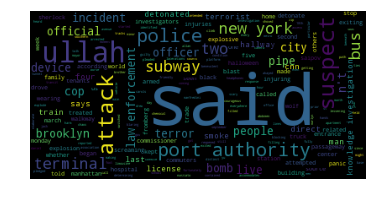

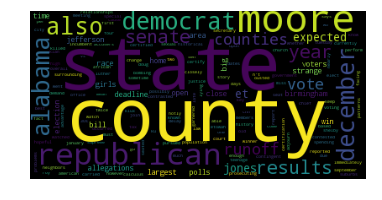

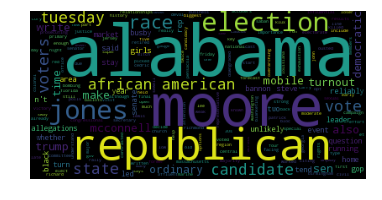

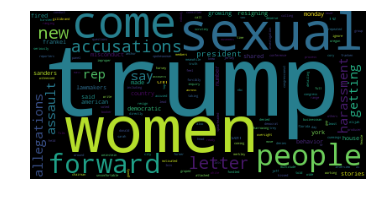

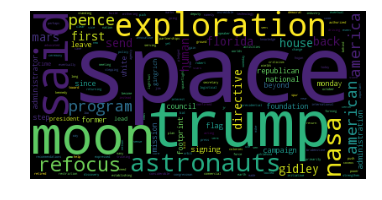

In [97]:
## Create the plot off our wordcloud
for i in range(5):
    plt.imshow(wordclouds[i])
## Turn OFF the axis displays in the plot
    plt.axis("off")
## Display the plot on the screen 
    plt.show()

### Calculating sentiment ratings for each text

In [102]:
# Making a copy of the sentiment analyzer with a short name
sid = SentimentIntensityAnalyzer()

totPos = 0.0
totNeg = 0.0

# Looping through the 5 articles
for i in range(5):
    artSentences = nltk.sent_tokenize(articles[i])
    # looping through the sentences of each article
    for sentence in artSentences:
        sentRating = sid.polarity_scores(sentence)
        totPos += sentRating['pos']
        totNeg += sentRating['neg']

    print(totPos)
    print(totNeg)

    print("===========================================\n")

# All articles have higher negative than positive scores

1.596
6.683

3.369
7.538

4.82
8.45

5.716
10.303

6.809
10.665



### Create bar plot showing frequency by article for the top 5 most common words from the combined 5 articles 

In [183]:
# Merge all articles into one list
flat_nostopw = [word for sublist in no_stopw for word in sublist]
# make a text out of the list 
text = nltk.Text(flat_nostopw)
# Remove punctuation from the text
text_nopunct = [w for w in text if w.isalpha()]
# Obtain the 5 most common words from out of the corpus text comprising the 5 articles
top_words = dict(FreqDist(text_nopunct).most_common(5)).keys()

In [184]:
# Make texts out of each article
texts = []
for i in range(5):
    texts.append(nltk.Text(no_stopw[i]))

In [210]:
# Find frequencies of the words 'said', 'trump', 'alabama', 'moore', and 'space' in the each article
freqs = []
for word in top_words:
    for i in range(5):
        freqs.append(texts[i].count(word))

In [211]:
# Get frequency data ready to plot by splitting the list of frequencies by word
size = 5
wordFreq_byText = [freqs[i:i+size] for i in range(0, len(freqs), size)]

In [212]:
wordFreq_byText 

[[0, 4, 11, 0, 0],
 [22, 0, 2, 2, 7],
 [0, 0, 0, 0, 11],
 [0, 0, 3, 8, 9],
 [0, 6, 9, 0, 0]]

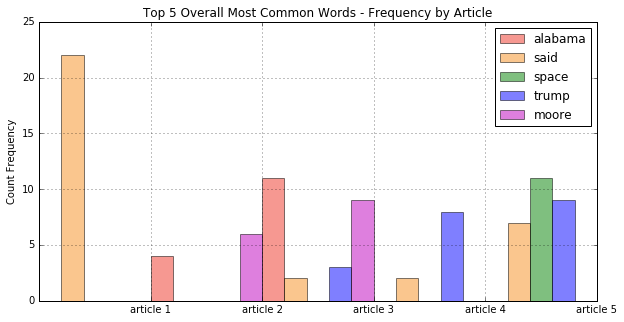

In [260]:
# Setting bar position and width
pos = list(range(5)) 
width = 0.20 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bar with "alabama" frequency for each article
plt.bar(pos, 
        # using the wordFreq_byText data,
        wordFreq_byText[0] , 
        # of width
        width, 
        # with alpha 0.5
        alpha = 0.5, 
        # with color
        color = '#EE3224') 

# Create bar with "said" frequency for each article
plt.bar([p + width for p in pos], 
        # using wordFreq_byText  data,
        wordFreq_byText[1],
        # of width
        width, 
        # with alpha 0.5
        alpha = 0.5, 
        # with color
        color = '#F78F1E') 

# Create bar with "space" frequency for each article
plt.bar([p + width*2 for p in pos], 
        # using wordFreq_byText  data,
        wordFreq_byText[2],
        # of width
        width, 
        # with alpha 0.5
        alpha = 0.5, 
        # with color
        color = 'g') 

# Create bar with "trump" frequency for each article
plt.bar([p + width*3 for p in pos], 
        # using wordFreq_byText  data,
        wordFreq_byText[3],
        # of width
        width, 
        # with alpha 0.5
        alpha = 0.5, 
        # with color
        color = 'b') 

# Create bar with "moore" frequency for each article
plt.bar([p + width*4 for p in pos], 
        # using wordFreq_byText  data,
        wordFreq_byText[4],
        # of width
        width, 
        # with alpha 0.5
        alpha = 0.5, 
        # with color
        color = 'm') 

# Set the y axis label
ax.set_ylabel('Count Frequency')

# Set the plot title
ax.set_title('Top 5 Overall Most Common Words - Frequency by Article')

# Set the position of the x ticks
ax.set_xticks([p + 5*width   for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(["article 1", "article 2", "article 3", "article 4", "article 5" ])

# Adding the legend and showing the plot
plt.legend(top_words, loc='upper right')
plt.grid()
plt.show()
